In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib



# Load from files and pre-process data

In [2]:
compression_rates=[1,2,4,8,16,32,64]

architectures = ['cnn','MLP']
structures = ['structured', 'unstructured']
methods = ['random', 'magnitude']
scopes = ['local', 'global']
result_types = ['accuracies', 'pgd-success', 'cw2-success', 'bb0-success']
results = dict()

for architecture in architectures:
    for structure in structures:
        for method in methods:
            for scope in scopes:
                for result_type in result_types:
                    file_name = f'{architecture}-{method}-{scope}-{structure}-{result_type}.json'
                    try:
                        with open(f'saved-results/{file_name}', 'r') as f:
                            res = json.load(f)
                            
                            if 'accuracies' in file_name:
                                
                                avg = get_average(res, res_type='accuracies')
                            elif 'bb0' in file_name:
                                avg = get_average(res, res_type='bb0' )
                                
                            elif 'pgd' in file_name:
                                avg = get_average(res,res_type='pgd' )
                            elif 'cw2' in file_name:
                                avg = get_average(res, res_type='cw2')
                                
                                
                            results[f'{architecture}-{method}-{scope}-{structure}-{result_type}'] = avg
                    except Exception as err:

                        print(err, file_name)

[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-accuracies.json' cnn-random-local-structured-accuracies.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-pgd-success.json' cnn-random-local-structured-pgd-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-cw2-success.json' cnn-random-local-structured-cw2-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-bb0-success.json' cnn-random-local-structured-bb0-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-global-structured-accuracies.json' cnn-random-global-structured-accuracies.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-global-structured-pgd-success.json' cnn-random-global-structured-pgd-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-global-structured-cw2-success.json' cnn-random-global-structured-cw2-success.js

# Helper Functions

In [7]:
def process_bb0(res):
    if type(res) == str:
        return 1
    epsilon = 10
    success = [True if x<epsilon else False for x in res]
    return sum(success)/len(success)

def get_average(all_values, res_type):#accuracies=False, bb0=False):
    value_per_pruning_rate=[]
    for i in range(len(all_values)):
        for j in range(len(all_values[i])):
            
            try:

                if res_type == 'cw2' or res_type == 'pgd':

                    value_per_pruning_rate[j].append(all_values[i][j])
                if res_type == 'accuracies':
                    value_per_pruning_rate[j].append(all_values[i][j][1])
                if res_type == 'bb0':
                    bb0_res = process_bb0(all_values[i][j][0])
                    value_per_pruning_rate[j].append(bb0_res)
            except:
                value_per_pruning_rate.append([])
                if res_type == 'cw2' or res_type == 'pgd':
                    value_per_pruning_rate[j].append(all_values[i][j])
                if res_type == 'accuracies':
                    value_per_pruning_rate[j].append(all_values[i][j][1])
                if res_type == 'bb0':
                    bb0_res = process_bb0(all_values[i][j])
                    value_per_pruning_rate[j].append(bb0_res)
                    
    if res_type == 'bb0':

        avg_value_per_pruning_rate = [sum(x)/len(x) for x in value_per_pruning_rate]
        
    else:
        avg_value_per_pruning_rate = [sum(x)/len(x) for x in value_per_pruning_rate]
    return avg_value_per_pruning_rate


In [5]:

import numpy as np
l = [None, True]
print(np.all(l))

None


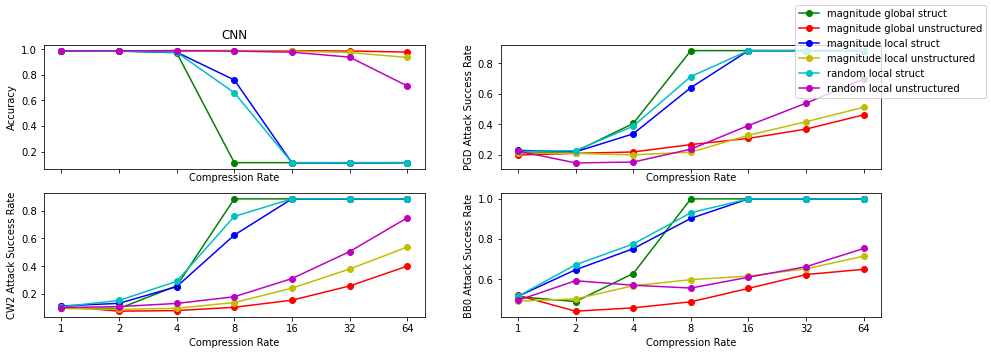

In [80]:

fig, (ax) = plt.subplots(2,2,figsize=(15,5), sharex=True)
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0


ax[0,0].plot(compression_rates, results['cnn-magnitude-global-structured-accuracies'],'go-',label='magnitude global struct')
ax[0,0].plot(compression_rates, results['cnn-magnitude-global-unstructured-accuracies'],'ro-', label='magnitude global unstructured')
ax[0,0].plot(compression_rates, results['cnn-magnitude-local-structured-accuracies'],'bo-', label='magnitude local struct')
ax[0,0].plot(compression_rates, results['cnn-magnitude-local-unstructured-accuracies'],'yo-', label='magnitude local unstructured')
ax[0,0].plot(compression_rates, results['cnn-random-local-structured-accuracies'],'co-', label='random local struct')
ax[0,0].plot(compression_rates, results['cnn-random-local-unstructured-accuracies'],'mo-', label='random local unstructured')

ax[0,0].set(title='CNN',ylabel='Accuracy', xlabel='Compression Rate')

ax[1,0].plot(compression_rates, results['cnn-magnitude-global-structured-cw2-success'],'go-',label='magnitude global struct')
ax[1,0].plot(compression_rates, results['cnn-magnitude-global-unstructured-cw2-success'],'ro-', label='magnitude global unstructured')
ax[1,0].plot(compression_rates, results['cnn-magnitude-local-structured-cw2-success'],'bo-', label='magnitude local struct')
ax[1,0].plot(compression_rates, results['cnn-magnitude-local-unstructured-cw2-success'],'yo-', label='magnitude local unstructured')
ax[1,0].plot(compression_rates, results['cnn-random-local-structured-cw2-success'],'co-', label='random local struct')
ax[1,0].plot(compression_rates, results['cnn-random-local-unstructured-cw2-success'],'mo-', label='random local unstructured')

ax[1,0].set(title='',ylabel='CW2 Attack Success Rate', xlabel='Compression Rate')

ax[0,1].plot(compression_rates, results['cnn-magnitude-global-structured-pgd-success'],'go-',label='magnitude global struct')
ax[0,1].plot(compression_rates, results['cnn-magnitude-global-unstructured-pgd-success'],'ro-', label='magnitude global unstructured')
ax[0,1].plot(compression_rates, results['cnn-magnitude-local-structured-pgd-success'],'bo-', label='magnitude local struct')
ax[0,1].plot(compression_rates, results['cnn-magnitude-local-unstructured-pgd-success'],'yo-', label='magnitude local unstructured')
ax[0,1].plot(compression_rates, results['cnn-random-local-structured-pgd-success'],'co-', label='random local struct')
ax[0,1].plot(compression_rates, results['cnn-random-local-unstructured-pgd-success'],'mo-', label='random local unstructured')

ax[0,1].set(title='',ylabel='PGD Attack Success Rate', xlabel='Compression Rate')

ax[1,1].plot(compression_rates, results['cnn-magnitude-global-structured-bb0-success'],'go-',label='magnitude global struct')
ax[1,1].plot(compression_rates, results['cnn-magnitude-global-unstructured-bb0-success'],'ro-', label='magnitude global unstructured')
ax[1,1].plot(compression_rates, results['cnn-magnitude-local-structured-bb0-success'],'bo-', label='magnitude local struct')
ax[1,1].plot(compression_rates, results['cnn-magnitude-local-unstructured-bb0-success'],'yo-', label='magnitude local unstructured')
ax[1,1].plot(compression_rates, results['cnn-random-local-structured-bb0-success'],'co-', label='random local struct')
ax[1,1].plot(compression_rates, results['cnn-random-local-unstructured-bb0-success'],'mo-', label='random local unstructured')

ax[1,1].set(title='',ylabel='BB0 Attack Success Rate', xlabel='Compression Rate')

# format xscale
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(compression_rates)

ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, )#loc='upper center')

plt.show()

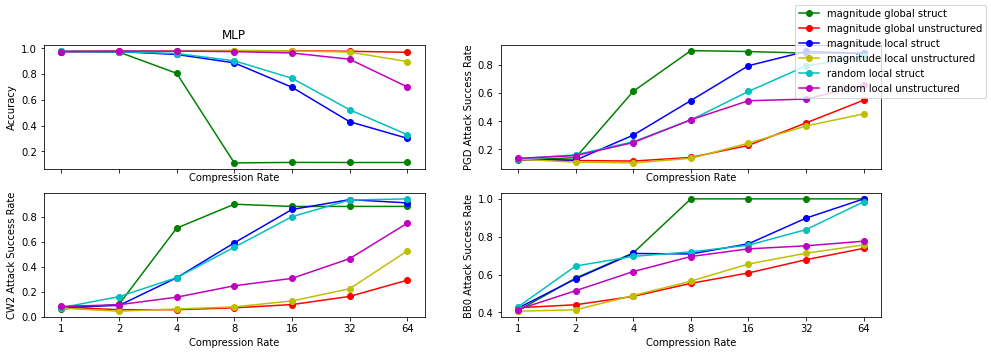

In [81]:

fig, (ax) = plt.subplots(2,2,figsize=(15,5), sharex=True)
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0


ax[0,0].plot(compression_rates, results['MLP-magnitude-global-structured-accuracies'],'go-',label='magnitude global struct')
ax[0,0].plot(compression_rates, results['MLP-magnitude-global-unstructured-accuracies'],'ro-', label='magnitude global unstructured')
ax[0,0].plot(compression_rates, results['MLP-magnitude-local-structured-accuracies'],'bo-', label='magnitude local struct')
ax[0,0].plot(compression_rates, results['MLP-magnitude-local-unstructured-accuracies'],'yo-', label='magnitude local unstructured')
ax[0,0].plot(compression_rates, results['MLP-random-local-structured-accuracies'],'co-', label='random local struct')
ax[0,0].plot(compression_rates, results['MLP-random-local-unstructured-accuracies'],'mo-', label='random local unstructured')

ax[0,0].set(title='MLP',ylabel='Accuracy', xlabel='Compression Rate')

ax[1,0].plot(compression_rates, results['MLP-magnitude-global-structured-cw2-success'],'go-',label='magnitude global struct')
ax[1,0].plot(compression_rates, results['MLP-magnitude-global-unstructured-cw2-success'],'ro-', label='magnitude global unstructured')
ax[1,0].plot(compression_rates, results['MLP-magnitude-local-structured-cw2-success'],'bo-', label='magnitude local struct')
ax[1,0].plot(compression_rates, results['MLP-magnitude-local-unstructured-cw2-success'],'yo-', label='magnitude local unstructured')
ax[1,0].plot(compression_rates, results['MLP-random-local-structured-cw2-success'],'co-', label='random local struct')
ax[1,0].plot(compression_rates, results['MLP-random-local-unstructured-cw2-success'],'mo-', label='random local unstructured')

ax[1,0].set(title='',ylabel='CW2 Attack Success Rate', xlabel='Compression Rate')

ax[0,1].plot(compression_rates, results['MLP-magnitude-global-structured-pgd-success'],'go-',label='magnitude global struct')
ax[0,1].plot(compression_rates, results['MLP-magnitude-global-unstructured-pgd-success'],'ro-', label='magnitude global unstructured')
ax[0,1].plot(compression_rates, results['MLP-magnitude-local-structured-pgd-success'],'bo-', label='magnitude local struct')
ax[0,1].plot(compression_rates, results['MLP-magnitude-local-unstructured-pgd-success'],'yo-', label='magnitude local unstructured')
ax[0,1].plot(compression_rates, results['MLP-random-local-structured-pgd-success'],'co-', label='random local struct')
ax[0,1].plot(compression_rates, results['MLP-random-local-unstructured-pgd-success'],'mo-', label='random local unstructured')

ax[0,1].set(title='',ylabel='PGD Attack Success Rate', xlabel='Compression Rate')

ax[1,1].plot(compression_rates, results['MLP-magnitude-global-structured-bb0-success'],'go-',label='magnitude global struct')
ax[1,1].plot(compression_rates, results['MLP-magnitude-global-unstructured-bb0-success'],'ro-', label='magnitude global unstructured')
ax[1,1].plot(compression_rates, results['MLP-magnitude-local-structured-bb0-success'],'bo-', label='magnitude local struct')
ax[1,1].plot(compression_rates, results['MLP-magnitude-local-unstructured-bb0-success'],'yo-', label='magnitude local unstructured')
ax[1,1].plot(compression_rates, results['MLP-random-local-structured-bb0-success'],'co-', label='random local struct')
ax[1,1].plot(compression_rates, results['MLP-random-local-unstructured-bb0-success'],'mo-', label='random local unstructured')

ax[1,1].set(title='',ylabel='BB0 Attack Success Rate', xlabel='Compression Rate')

# format xscale
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(compression_rates)

ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, )#loc='upper center')

plt.show()

In [74]:
results

{'cnn-random-local-structured-accuracies': [0.9840699970722199,
  0.984060001373291,
  0.9750699937343598,
  0.6593500003218651,
  0.11349999904632568,
  0.11349999904632568,
  0.11349999904632568],
 'cnn-random-local-structured-pgd-success': [0.2213,
  0.22600000000000003,
  0.38709999999999994,
  0.7137,
  0.8840000000000001,
  0.8840000000000001,
  0.8840000000000001],
 'cnn-random-local-structured-cw2-success': [0.1079,
  0.15339999999999998,
  0.2905,
  0.7577999999999999,
  0.8840000000000001,
  0.8840000000000001,
  0.8840000000000001],
 'cnn-random-local-structured-bb0-success': None,
 'cnn-magnitude-local-structured-accuracies': [0.9848699867725372,
  0.9860699951648713,
  0.9758499979972839,
  0.7593600079417229,
  0.11242999881505966,
  0.11135999858379364,
  0.11349999904632568],
 'cnn-magnitude-local-structured-pgd-success': [0.22820000000000001,
  0.2184,
  0.3367,
  0.6409,
  0.8839,
  0.8838000000000001,
  0.8840000000000001],
 'cnn-magnitude-local-structured-cw2-succes